In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import math

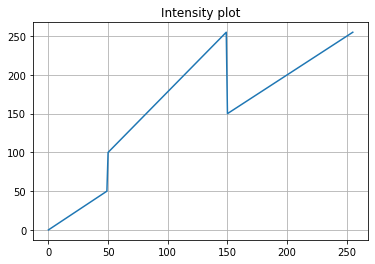

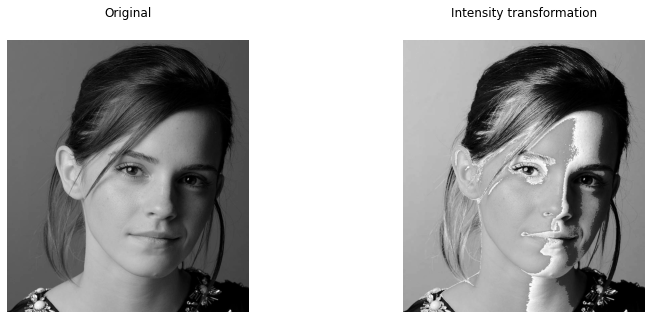

In [27]:
a1 = np.linspace(0,50,50)
a2 = np.linspace(100,255,100)
a3 = np.linspace(150,255,106)

plt.figure() 
intensity = np.concatenate((a1,a2,a3),axis=0)
plt.plot(intensity)
plt.title('Intensity plot')
plt.grid()

img = cv.imread(r'C:\Users\Nushad\Documents\Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\HW excercises\Assignement 1\emma_gray.jpg', cv.IMREAD_GRAYSCALE)
assert img is not None

g = cv.LUT(img,intensity)

fig, ax = plt.subplots(1,2,figsize=(13,5))

ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original')
ax[0].axis('off')
ax[0].xaxis.tick_top()

ax[1].imshow(g,cmap='gray',vmin=0,vmax=255)
ax[1].set_title('Intensity transformation')
ax[1].axis('off')
ax[1].xaxis.tick_top()

plt.show()


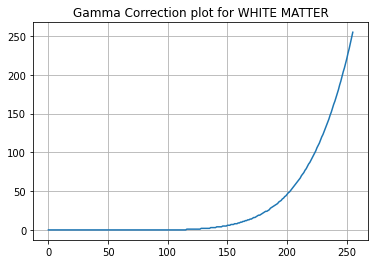

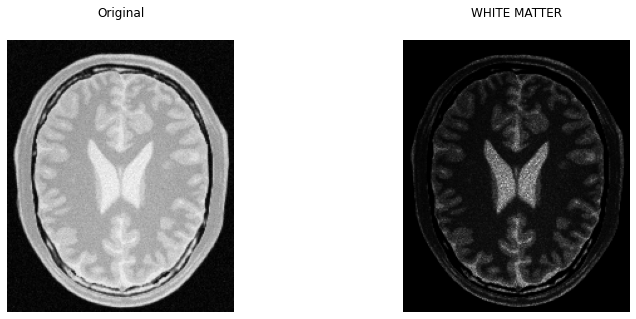

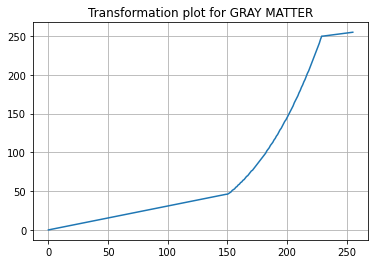

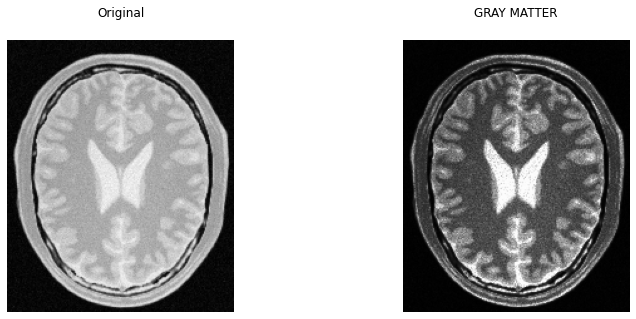

In [28]:
img = cv.imread(r'C:\Users\Nushad\Documents\Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\HW excercises\Assignement 1\brain_proton_density_slice.png', cv.IMREAD_GRAYSCALE)
assert img is not None

# white matter
gamma = 7
plt.figure()
t = np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8)
plt.plot(t)
plt.title('Gamma Correction plot for WHITE MATTER')
plt.grid()

g = cv.LUT(img,t)
fig, ax = plt.subplots(1,2,figsize=(13,5))

ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original')
ax[0].axis('off')
ax[0].xaxis.tick_top()

ax[1].imshow(g,cmap='gray',vmin=0,vmax=255)
ax[1].set_title('WHITE MATTER')
ax[1].axis('off')
ax[1].xaxis.tick_top()

# gray matter
gamma = 4
plt.figure()
t1 = np.array([(p/230)**gamma*255 for p in range(150,230)]).astype(np.uint8)
t0 = np.linspace(0,min(t1),150)
t2 = np.linspace(max(t1),255,26)
t_ = np.concatenate((t0, t1, t2),axis=0)
plt.plot(t_)
plt.title('Transformation plot for GRAY MATTER')
plt.grid()


g = cv.LUT(img,t_)

fig, ax = plt.subplots(1,2,figsize=(13,5))

ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].set_title('Original')
ax[0].axis('off')
ax[0].xaxis.tick_top()

ax[1].imshow(g,cmap='gray',vmin=0,vmax=255)
ax[1].set_title('GRAY MATTER')
ax[1].axis('off')
ax[1].xaxis.tick_top()

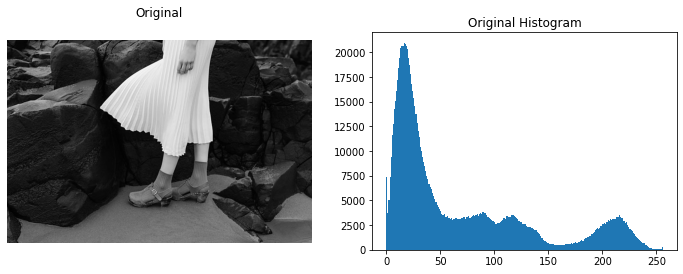

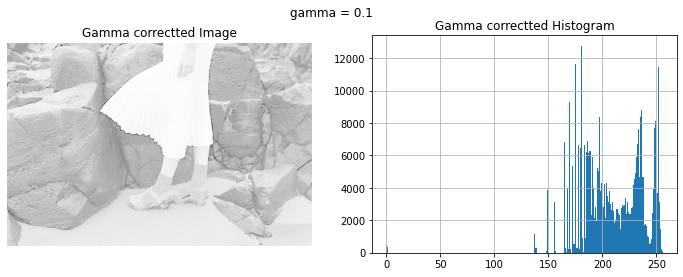

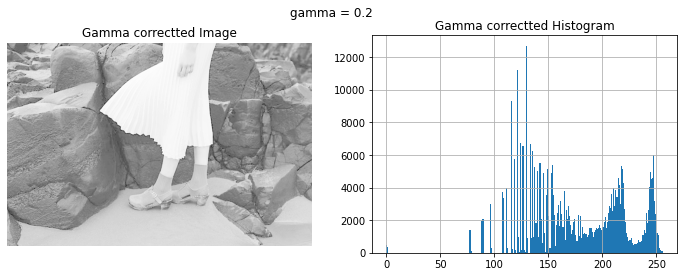

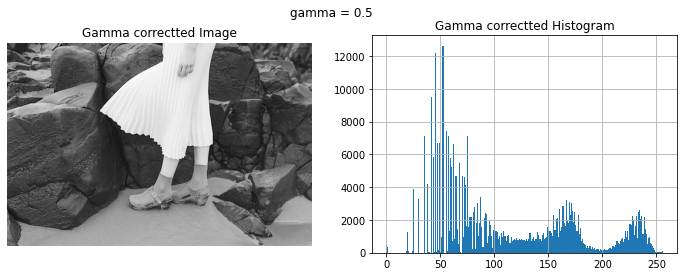

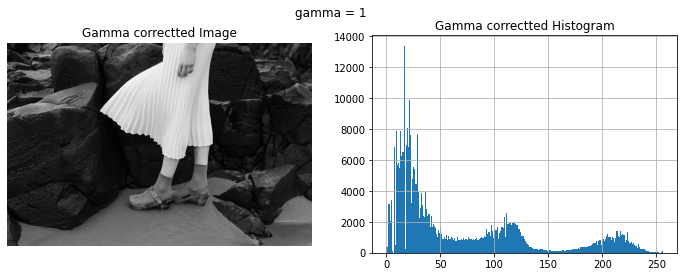

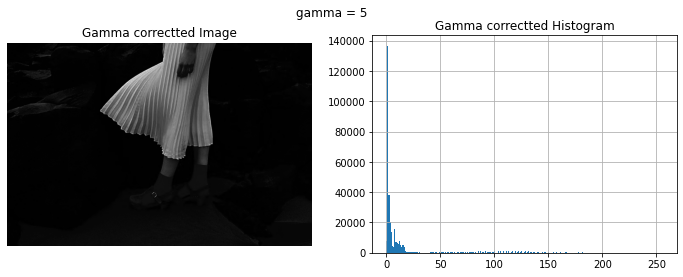

In [47]:
img = cv.imread(r'C:\Users\Nushad\Documents\Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\HW excercises\Assignement 1\highlights_and_shadows.jpg')
assert img is not None


gammas = [0.1, 0.2, 0.5, 1, 5]
fig, ax = plt.subplots(1,2, figsize = (12,4))
ax[0].imshow(cv.cvtColor(img,cv.COLOR_BGR2GRAY),cmap='gray',vmin=0,vmax=255 )
ax[0].set_title("Original")
ax[0].axis('off')
ax[0].xaxis.tick_top()

ax[1].hist(img.flatten(), 256, [0,256])
ax[1].set_title("Original Histogram")

for n,gamma in enumerate(gammas,1):
    lab = cv.cvtColor(img, cv.COLOR_BGR2Lab)
    t = np.array([(p/255)**gamma*255 for p in range(0,256)]).astype(np.uint8)
    lab[:,:,0] = cv.LUT(lab[:,:,0],t)
    lab = cv.cvtColor(lab, cv.COLOR_Lab2BGR)

    fig, ax = plt.subplots(1,2, figsize = (12,4))

    plt.suptitle("gamma = " + str(gamma))


    lab_gray = cv.cvtColor(lab,cv.COLOR_BGR2GRAY)
    ax[0].imshow(lab_gray,cmap='gray',vmin=0,vmax=255 )
    ax[0].set_title("Gamma correctted Image")
    ax[0].axis('off')
  
    ax[1].hist(lab_gray.flatten(), 256, [0,256])
    ax[1].set_title("Gamma correctted Histogram")
    ax[1].grid()

plt.show()


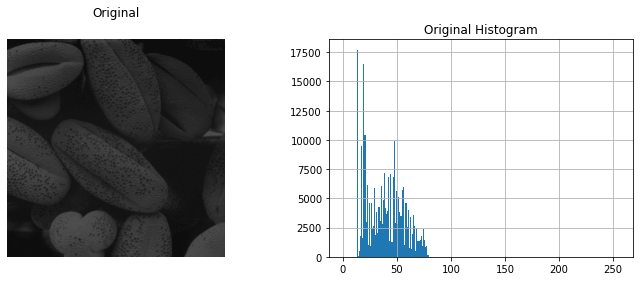

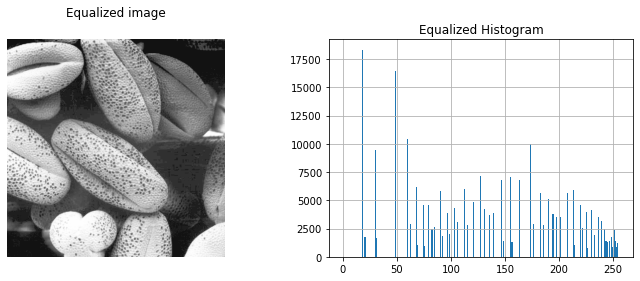

In [30]:
def histEqualize(image):
    hist = cv.calcHist([image], [0], None, [256], [0,256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * ((len(hist)-1)/cdf.max())
    t = cdf_normalized.astype(int)
    equalized = cv.LUT(image, t)
    return equalized

img = cv.imread(r'C:\Users\Nushad\Documents\Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\HW excercises\Assignement 1\shells.png', cv.IMREAD_GRAYSCALE)
assert img is not None


fig, ax = plt.subplots(1,2, figsize = (12,4))
# hist_img = cv.calcHist([img], [0], None, [256], [0,256])
ax[0].imshow(img,cmap='gray',vmin=0,vmax=255)
ax[0].set_title("Original")
ax[0].axis('off')
ax[0].xaxis.tick_top()

ax[1].hist(img.flatten(), 256, [0,256])
ax[1].set_title("Original Histogram")
ax[1].grid()
# eq = cv.equalizeHist(img)

# hist_eq = cv.calcHist([eq],[0], None, [256], [0,256])
equalized_img = histEqualize(img)
fig, ax = plt.subplots(1,2, figsize = (12,4))
# hist_img = cv.calcHist([equalized_img], [0], None, [256], [0,256])
ax[0].imshow(equalized_img,cmap='gray',vmin=0,vmax=255)
ax[0].set_title("Equalized image")
ax[0].axis('off')
ax[0].xaxis.tick_top()

ax[1].hist(equalized_img.flatten(), 256, [0, 256])
ax[1].set_title("Equalized Histogram")
ax[1].grid()


plt.show()

In [64]:
def nearest_neighbour(image, scale):
    rows = int(image.shape[0]*scale)
    cols = int(image.shape[1]*scale)
    zoomed = np.zeros((rows, cols, 3), dtype=image.dtype)
    for i in range(rows):
        for j in range(cols):           
            if round(i/scale) == image.shape[0]: i = i - scale
            if round(j/scale) == image.shape[1]: j = j - scale
            zoomed[i,j] = image[round(i/scale), round(j/scale)]

    return zoomed.astype(np.uint8)



def bilinear_interpolation(image, scale):
    rows = int(image.shape[0]*scale)
    cols = int(image.shape[1]*scale)
 
    zoomed = np.zeros((rows, cols, 3), dtype='float')
    for i in range(rows):
        for j in range(cols):
           
            if math.ceil(i/scale) == image.shape[0]: i = i - scale
            if math.ceil(j/scale) == image.shape[1]: j = j - scale

            r, c = i/scale, j/scale
            r_f = math.floor(r)
            c_f = math.floor(c)

            r_c = math.ceil(r)
            c_c = math.ceil(c)


            a = r - r_f
            b = c - c_f
            zoomed[i, j] = (1-a)*(1-b)*image[r_f,c_f] + (1-a)*(b)*image[r_f,c_c] + (a)*(1-b)*image[r_c,c_f] + (a)*(b)*image[r_c,c_c] 

    return zoomed.astype(np.uint8)


img1 = cv.cvtColor(cv.imread(r"C:\Users\Nushad\Documents\Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\HW excercises\Assignement 1\a1q5images\a1q5images\im01.png", cv.IMREAD_COLOR), cv.COLOR_BGR2RGB).astype(np.uint8)
assert img1 is not None

img1_small = cv.cvtColor(cv.imread(r"C:\Users\Nushad\Documents\Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\HW excercises\Assignement 1\a1q5images\a1q5images\im01small.png", cv.IMREAD_COLOR), cv.COLOR_BGR2RGB).astype(np.uint8)
assert img1_small is not None

img2 =  cv.cvtColor(cv.imread(r"C:\Users\Nushad\Documents\Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\HW excercises\Assignement 1\a1q5images\a1q5images\im02.png", cv.IMREAD_COLOR), cv.COLOR_BGR2RGB).astype(np.uint8)
assert img2 is not None

img2_small =  cv.cvtColor(cv.imread(r"C:\Users\Nushad\Documents\Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\HW excercises\Assignement 1\a1q5images\a1q5images\im02small.png", cv.IMREAD_COLOR), cv.COLOR_BGR2RGB).astype(np.uint8)
assert img2_small is not None

img3 =  cv.cvtColor(cv.imread(r"C:\Users\Nushad\Documents\Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\HW excercises\Assignement 1\a1q5images\a1q5images\im03.png", cv.IMREAD_COLOR), cv.COLOR_BGR2RGB).astype(np.uint8)
assert img3 is not None

img3_small = cv.cvtColor(cv.imread(r"C:\Users\Nushad\Documents\Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\HW excercises\Assignement 1\a1q5images\a1q5images\im03small.png", cv.IMREAD_COLOR), cv.COLOR_BGR2RGB).astype(np.uint8)
assert img3_small is not None



# scale = 0.75

# cv.imshow('Im01_small' + str(scale), cv.cvtColor(img1_small, cv.COLOR_RGB2BGR))
# cv.waitKey(0) 
# cv.destroyAllWindows()

# zoom_nn = nearest_neighbour(img1_small, scale)
# cv.imshow('Nearest neighbour(Im01_small): scale = ' + str(scale), cv.cvtColor(zoom_nn, cv.COLOR_RGB2BGR))
# cv.waitKey(0) 
# cv.destroyAllWindows()

# zoom_bli = bilinear_interpolation(img1_small, scale)
# cv.imshow('Bilinear_interpolation(Im01_small): scale = ' + str(scale), cv.cvtColor(zoom_bli, cv.COLOR_RGB2BGR))
# cv.waitKey(0) 
# cv.destroyAllWindows()

# # comparition with original
# scale = 4
# zoom_nn_ = nearest_neighbour(img1_small, scale)
# error = cv.norm(img1,zoom_nn_ , cv.NORM_L2)
# similarity = 1 - error/(img1.shape[0]*img1.shape[0])
# print('Similarity of Im01(Nearest neighbour) = ',round(similarity*100,4),'%')

# zoom_bli_ = bilinear_interpolation(img1_small, scale)
# error = cv.norm(img1,zoom_bli_ , cv.NORM_L2)
# similarity = 1 - error/(img1.shape[0]*img1.shape[0])
# print('Similarity of Im01(Bilinear interpolation) = ',round(similarity*100,4),'%')


scale = 2

cv.imshow('Im02_small' + str(scale), cv.cvtColor(img2_small, cv.COLOR_RGB2BGR))
cv.waitKey(0) 
cv.destroyAllWindows()

zoom_nn = nearest_neighbour(img2_small, scale)
cv.imshow('Nearest neighbour(Im02_small): scale = ' + str(scale), cv.cvtColor(zoom_nn, cv.COLOR_RGB2BGR))
cv.waitKey(0) 
cv.destroyAllWindows()

zoom_bli = bilinear_interpolation(img2_small, scale)
cv.imshow('Bilinear_interpolation(Im02_small): scale = ' + str(scale), cv.cvtColor(zoom_bli, cv.COLOR_RGB2BGR))
cv.waitKey(0) 
cv.destroyAllWindows()

# comparition with original
scale = 4
zoom_nn_ = nearest_neighbour(img2_small, scale)
error = cv.norm(img2,zoom_nn_ , cv.NORM_L2)
similarity = 1 - error/(img2.shape[0]*img2.shape[0])
print('Similarity of Im02(Nearest neighbour) = ',round(similarity*100,4),'%')

zoom_bli_ = bilinear_interpolation(img2_small, scale)
error = cv.norm(img2,zoom_bli_ , cv.NORM_L2)
similarity = 1 - error/(img2.shape[0]*img2.shape[0])
print('Similarity of Im02(Bilinear interpolation) = ',round(similarity*100,4),'%')

scale = 0.24

cv.imshow('Im03_small' + str(scale), cv.cvtColor(img3_small, cv.COLOR_RGB2BGR))
cv.waitKey(0) 
cv.destroyAllWindows()

zoom_nn = nearest_neighbour(img3_small, scale)
cv.imshow('Nearest neighbour(Im03_small): scale = ' + str(scale), cv.cvtColor(zoom_nn, cv.COLOR_RGB2BGR))
cv.waitKey(0) 
cv.destroyAllWindows()

zoom_bli = bilinear_interpolation(img3_small, scale)
cv.imshow('Bilinear_interpolation(Im03_small): scale = ' + str(scale), cv.cvtColor(zoom_bli, cv.COLOR_RGB2BGR))
cv.waitKey(0) 
cv.destroyAllWindows()

# comparition with original
# scale = 4
# zoom_nn_ = nearest_neighbour(img3_small, scale)
# error = cv.norm(img3,zoom_nn_ , cv.NORM_L2)
# similarity = 1 - error/(img3.shape[0]*img3.shape[0])
# print('Similarity of Im03(Nearest neighbour) = ',round(similarity*100,4),'%')

# zoom_bli_ = bilinear_interpolation(img3_small, scale)
# error = cv.norm(img3,zoom_bli_ , cv.NORM_L2)
# similarity = 1 - error/(img3.shape[0]*img3.shape[0])
# print('Similarity of Im03(Bilinear interpolation) = ',round(similarity*100,4),'%')


Similarity of Im02(Nearest neighbour) =  98.2935 %
Similarity of Im02(Bilinear interpolation) =  98.3334 %


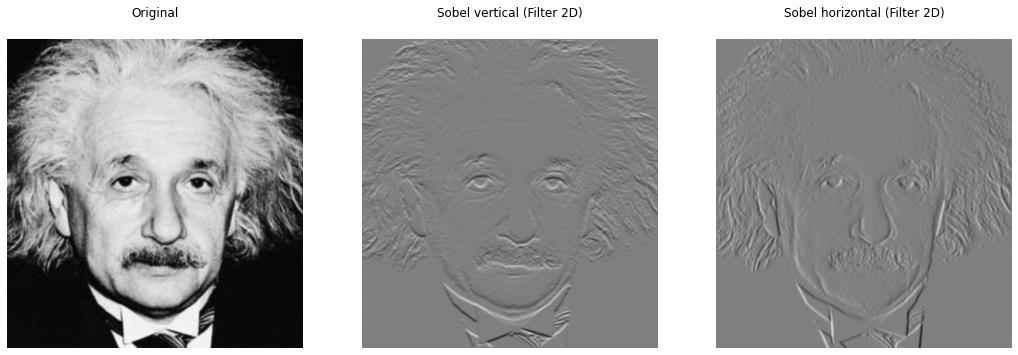

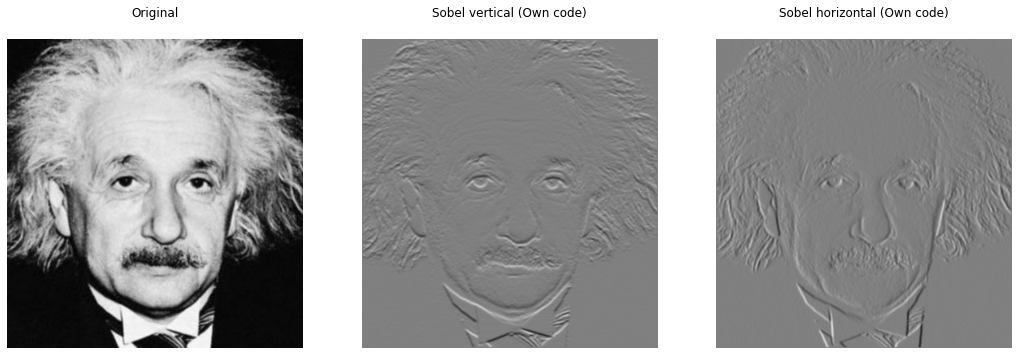

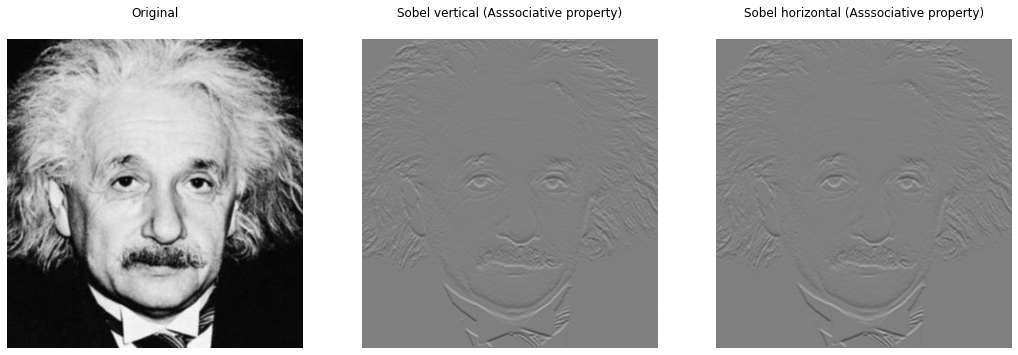

In [32]:
img = cv.imread(r'C:\Users\Nushad\Documents\Semester 4\EN2550 - Fundamentals of Image Processing and Machine Vision\HW excercises\Assignement 1\einstein.png', cv.IMREAD_GRAYSCALE).astype(np.float32)
assert img is not None
# part A

# Sobel vertical
kernal_v = np.array([(-1,-2,-1),(0,0,0),(1,2,1)], dtype='float32')
imgv = cv.filter2D(img, -1, kernal_v)

# Sobel horizontal
kernal_h = np.array([(-1,0,1),(-2,0,2),(-1,0,1)], dtype='float32')
imgh = cv.filter2D(img, -1, kernal_h)

fig, ax = plt.subplots(1, 3, figsize=(18,18))
ax[0].imshow(img, cmap='gray', vmin=0, vmax=256)
ax[0].set_title("Original")
ax[0].axis('off')
ax[0].xaxis.tick_top()

ax[1].imshow(imgv, cmap='gray', vmin=-1020, vmax=1020)
ax[1].set_title("Sobel vertical (Filter 2D)")
ax[1].axis('off')
ax[1].xaxis.tick_top()

ax[2].imshow(imgh, cmap='gray', vmin=-1020, vmax=1020)
ax[2].set_title("Sobel horizontal (Filter 2D)")
ax[2].axis('off')
ax[2].xaxis.tick_top()

plt.show()




# Part B
def filter_func(image, kernel):
    assert kernel.shape[0]%2 == 1 and kernel.shape[1]%2 == 1

    k_hh , k_hw = math.floor(kernel.shape[0] / 2), math.floor(kernel.shape[1] / 2)
    h , w = image.shape

    image_f = image.astype('float')
    output = np.zeros(image.shape , 'float')

    for m in range(k_hh , h - k_hh):
        for n in range(k_hw , w - k_hw):
            output[m, n] = np.dot(image_f[m-k_hh: m+k_hh + 1 , n - k_hw : n + k_hw + 1 ].flatten(), kernel.flatten())
    return output

imgv_2 = filter_func(img, kernal_v)
imgh_2 = filter_func(img, kernal_h)


fig, ax = plt.subplots(1, 3, figsize=(18,18))
ax[0].imshow(img, cmap='gray', vmin=0, vmax=256)
ax[0].set_title("Original")
ax[0].axis('off')
ax[0].xaxis.tick_top()

ax[1].imshow(imgv_2, cmap='gray', vmin=-1020, vmax=1020)
ax[1].set_title("Sobel vertical (Own code)")
ax[1].axis('off')
ax[1].xaxis.tick_top()

ax[2].imshow(imgh_2, cmap='gray', vmin=-1020, vmax=1020)
ax[2].set_title("Sobel horizontal (Own code)")
ax[2].axis('off')
ax[2].xaxis.tick_top()

plt.show()

# part C
kernel_v1 = np.array((-1, 0, 1), dtype = np.float32)
kernel_v2 = np.array(((-1),(2),(1)), dtype = np.float32)
imgv_3 = cv.filter2D(cv.filter2D(img, -1, kernel_v1), -1, kernel_v2)


kernel_h1 = np.array((-1, -2, -1), dtype = np.float32)
kernel_h2 = np.array(((1), (0) ,(-1)) , dtype = np.float32)
imgh_3 =  cv.filter2D(cv.filter2D(img, -1, kernel_v1), -1, kernel_v2)

fig, ax = plt.subplots(1, 3, figsize=(18,18))
ax[0].imshow(img, cmap='gray', vmin=0, vmax=256)
ax[0].set_title("Original")
ax[0].axis('off')
ax[0].xaxis.tick_top()

ax[1].imshow(imgv_3, cmap='gray', vmin=-1020, vmax=1020)
ax[1].set_title("Sobel vertical (Asssociative property)")
ax[1].axis('off')
ax[1].xaxis.tick_top()

ax[2].imshow(imgh_3, cmap='gray', vmin=-1020, vmax=1020)
ax[2].set_title("Sobel horizontal (Asssociative property)")
ax[2].axis('off')
ax[2].xaxis.tick_top()

plt.show()
